<a href="https://colab.research.google.com/github/ketanp23/LLMandAgentsclass/blob/main/Word2Vec_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python program to generate word vectors using Word2Vec
import nltk
nltk.download('punkt_tab')
!pip install gensim



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [1]:

# importing all necessary modules

from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
f = "This is a cute Dog. My Cat is Cute" #Sentence

In [3]:
data = []

In [4]:
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

model1 = gensim.models.Word2Vec(...): This line creates a Word2Vec model and assigns it to the variable model1.

data: This is the input data used to train the model. It's a list of sentences, where each sentence is a list of words (as processed in the previous cell).

min_count=1: This parameter specifies that words that appear at least once in the data will be included in the vocabulary.

vector_size=100: This sets the dimensionality of the word vectors to 100. Each word will be represented by a 100-element vector.

window=5: This parameter defines the context window size. For a given word, the model will consider words within a window of 5 words before and 5 words after it to predict the target word (in the case of CBOW) or predict the context words (in the case of Skip-gram).

In essence, this code learns numerical representations (vectors) for each word in your input data based on their context. These vectors can capture semantic relationships between words.

In [5]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)


In [6]:
# Print results
print("Cosine similarity between 'cat' " +
      "and 'dog' - CBOW : ",
      model1.wv.similarity('cat', 'dog'))


Cosine similarity between 'cat' and 'dog' - CBOW :  0.0640898


In [7]:
print("Cosine similarity between 'is' " +
      "and 'cute' - CBOW : ",
      model1.wv.similarity('is', 'cute'))

Cosine similarity between 'is' and 'cute' - CBOW :  -0.010839177


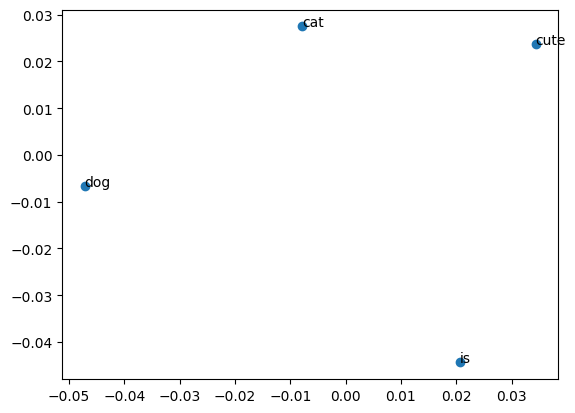

In [8]:
#Visualizing data
words = ["cat", "dog", "is", "cute"]

X = model1.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()